# Homework 2

### Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm
from scipy.optimize import curve_fit

In [2]:
#import steam_analysis module to perform operations on the dataset
import steam_analysis as steam

### Load dataset

In [5]:
#dataset filenames
dataset_main = 'dataset/steam_reviews.csv'
dataset_bonus1 = 'dataset/steam_reviews_bonus_1.csv'
dataset_bonus2 = 'dataset/steam_reviews_bonus_2.csv'

In [6]:
#load main dataset
df = pd.read_csv(dataset_main)

In [ ]:
#load bonus dataset
df = pd.concat(pd.read_csv(dataset_bonus1))
df = pd.concat(pd.read_csv(dataset_bonus1))

### DEBUG

In [4]:
#skip the above two cells and run this one instead if you have problems loading the whole dataset
for chunk in pd.read_csv(dataset_main, chunksize=10000000):
    df = chunk
    break

# [RQ1] Exploratory Data Analysis (EDA)

## Description

In [7]:
#print a description of the dataset and a list of its columns
steam.describe_dataset(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

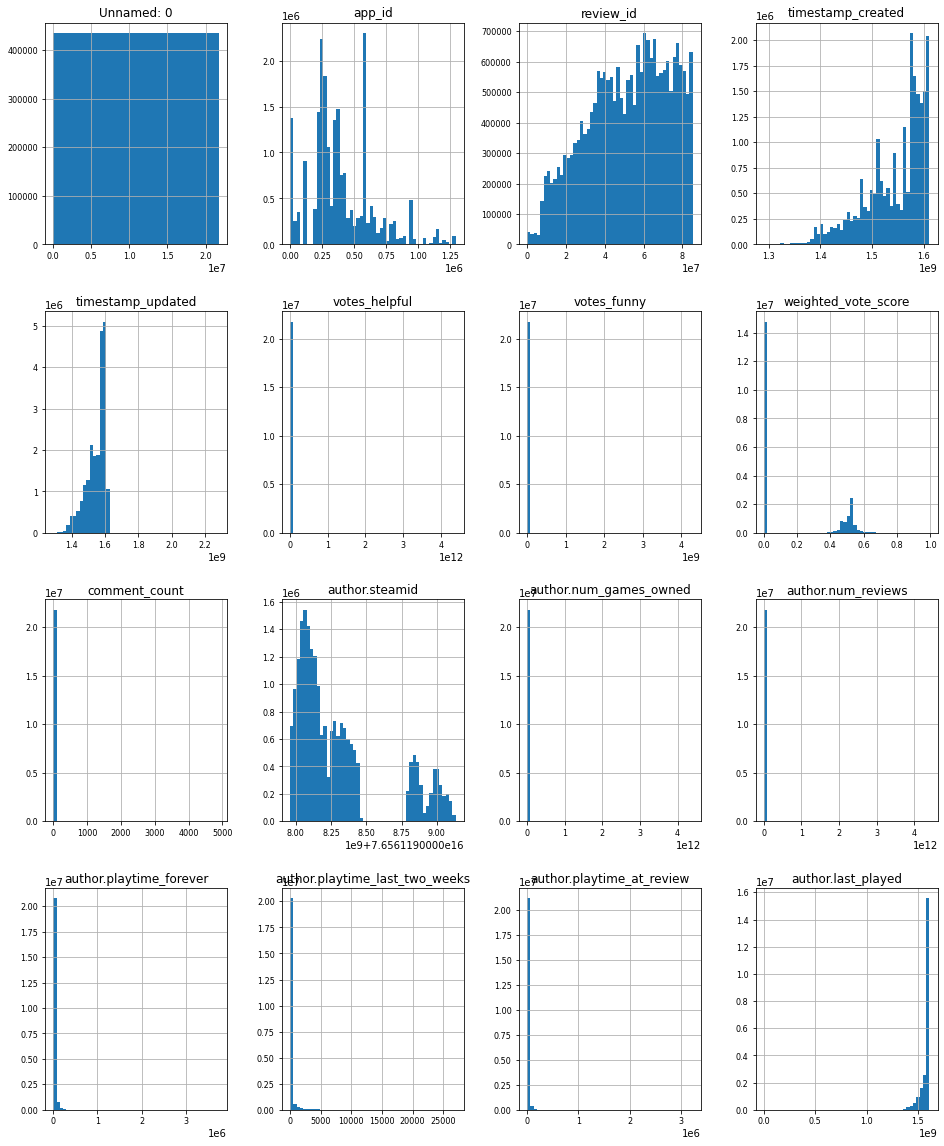

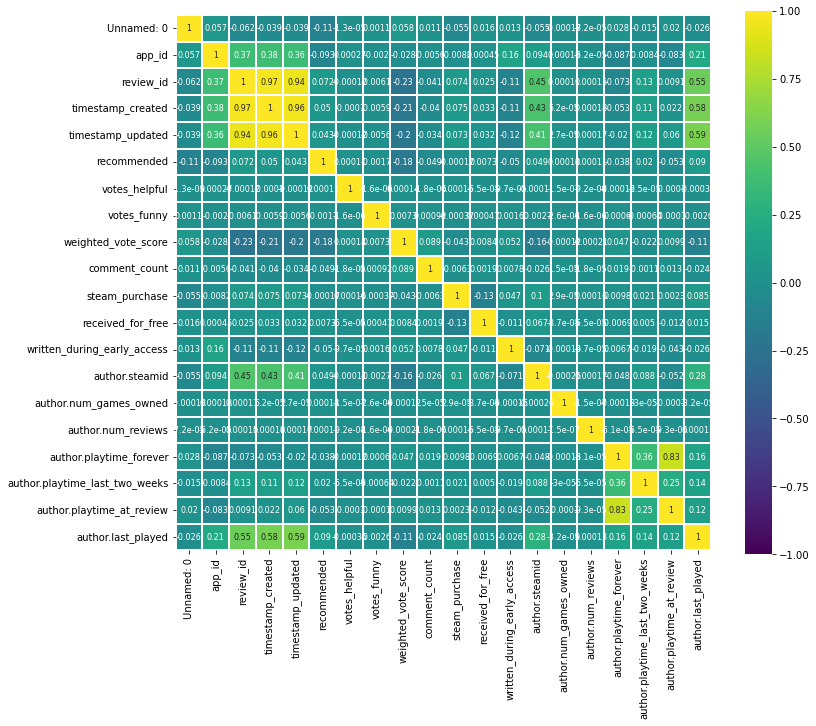

In [8]:
#print a summary analysis of the whole dataset, included a correlation graph
steam.plot_insight_graphs(df)

# [RQ2]

### Plot the number of reviews for each application in descending order.

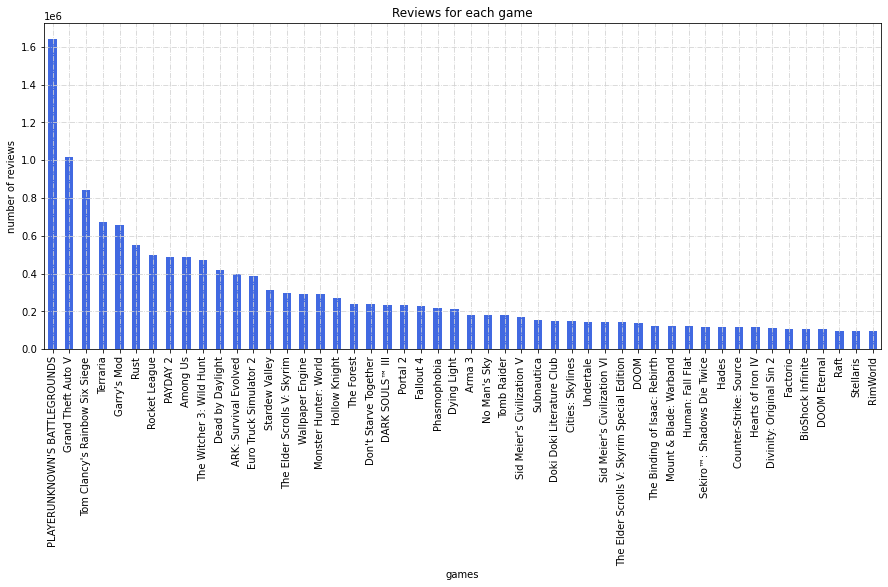

In [9]:
#plot a chart of the number of reviews for each game (for clarity the top 50)
steam.plot_reviews_chart(df, 50)

### What applications have the best Weighted Vote Score?

In [10]:
#print a list of the best weighted vote score
steam.best_weighted_vote_score(df)

app_name
Hunt Down The Freeman    0.502150
Urban Empire             0.438623
METAL GEAR SURVIVE       0.421632
Identity                 0.415384
Umbrella Corps           0.414678
Name: weighted_vote_score, dtype: float64


### Which applications have the most and the least recommendations?

In [11]:
#print the five top recommended games and the five least recommended games
steam.recommendations_summary(df)

Most recommended games: 
app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     886417
Grand Theft Auto V                831311
Tom Clancy's Rainbow Six Siege    742397
Terraria                          658741
Garry's Mod                       632558
Name: recommended, dtype: int64 


Least recommended games: 
app_name
Out of the Park Baseball 19    594
Shadow Complex Remastered      587
Identity                       439
DRAGON QUEST HEROES™ II        423
Neon Hardcorps                  89
Name: recommended, dtype: int64


### How many of these applications were purchased, and how many were given for free?

                       received_for_free  steam_purchase
app_name                                                
20XX                                  51            3204
A Hat in Time                        820           27262
A Short Hike                          99            4566
A Way Out                            296            7416
ARK: Survival Evolved              12046          316015 



Games received for free: 688061/21747371


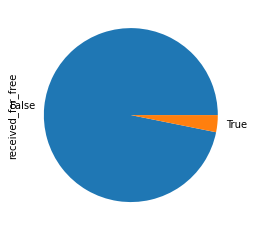

Games purchased: 16842432/21747371


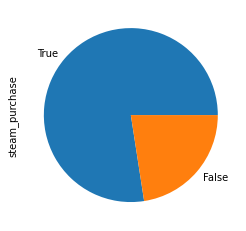

In [12]:
#print a table containing the steam_purchase and received_for_free columns
#print two pie charts: one of the games received for free, one of the games purchased
steam.plot_free_or_purchased(df)

# [RQ3]

### What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

In [13]:
#print most common time at which an application is reviewed
steam.most_common_review_time(df, 5)

14:50
15:05
14:37
15:07
15:04


### Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

### Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

  time interval (start, end)  total reviews
0       (06:00:00, 10:59:59)        3925459
1       (11:00:00, 13:59:59)        2971997
2       (14:00:00, 16:59:59)        3377469
3       (17:00:00, 19:59:59)        3257494
4       (20:00:00, 23:59:59)        3617426
5       (00:00:00, 02:59:59)        2351647
6       (03:00:00, 05:59:59)        2245879


<Figure size 432x288 with 0 Axes>

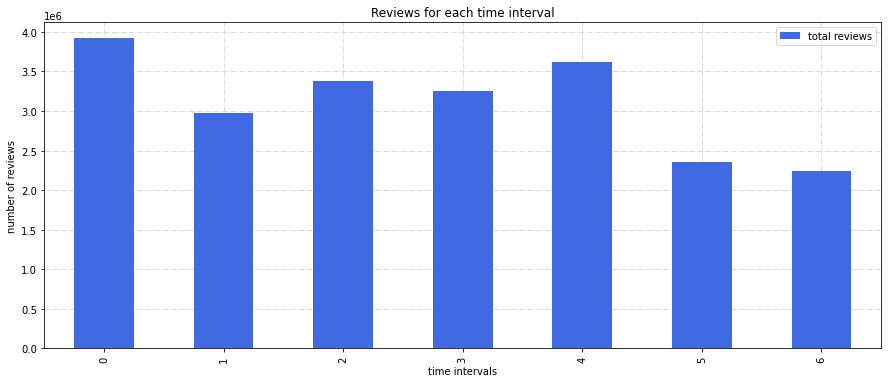

In [14]:
#list of tuple of time intervals as requested in the Research Question (RQ3)
time_intervals = [('06:00:00', '10:59:59'),
('11:00:00', '13:59:59'),
('14:00:00', '16:59:59'),
('17:00:00', '19:59:59'),
('20:00:00', '23:59:59'),
('00:00:00', '02:59:59'),
('03:00:00', '05:59:59')]

#print a bar plot of the number of reviews for each time interval passed
steam.reviews_between_time_intervals(df, time_intervals)


# [RQ4]

## Top Languages
First, we want to check in what languages most of the reviews are written in.

Let's use a dataframe with only the columns we need, so we can minimise the execution times.

In [15]:
df_rq4 = df[['review_id', 'language', 'votes_funny', 'votes_helpful']]

## What are the most common languages?

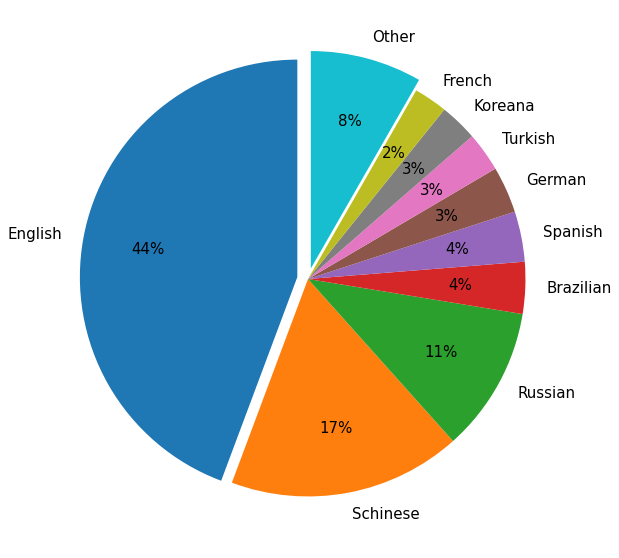

The top three most common languages are:

English with 9635437 reviews
Schinese with 3764967 reviews
Russian with 2348900 reviews


In [16]:
steam.languages_pie(df_rq4['language'])

top_languages = steam.sort_count(steam.count_languages(df_rq4))
steam.print_top_languages(top_languages)

### Now let's filter the dataset so it only includes reviews in these languages
How did other users consider these reviews: 'Funny' or 'Helpful'?

In [17]:
filtered_df = steam.filter_by_language(df_rq4, [language for language, _ in top_languages])

11% of the English reviews were considered 'Funny'
29% of the English reviews were considered 'Helpful'

12% of the Schinese reviews were considered 'Funny'
25% of the Schinese reviews were considered 'Helpful'

17% of the Russian reviews were considered 'Funny'
36% of the Russian reviews were considered 'Helpful'



Generally the reviews in Russian seem to attract more interactions **among these three languages**, as they were rated more often either 'Funny' or 'Helpful' than the English or Chinese ones, which were rated similarly. 

# [RQ5]

## The reviews' authors are users from the game that provide their opinion on it. Now lets check how often they make reviews.

### Lets plot the top 10 most popular reviewers and the number of reviews

Here we create a new dataframe with the authors id and the number of reviews they made and sorted them in descending order
based on the number of reviews.

In [18]:
most_pop=steam.ten_popular_reviewers(df)
most_pop

author.steamid
76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
76561198064946151    100
76561198013146396     99
76561198027973295     96
76561197969749884     88
76561197989746995     86
dtype: int64

These are the top ten most popular authors who made the most number of reviews

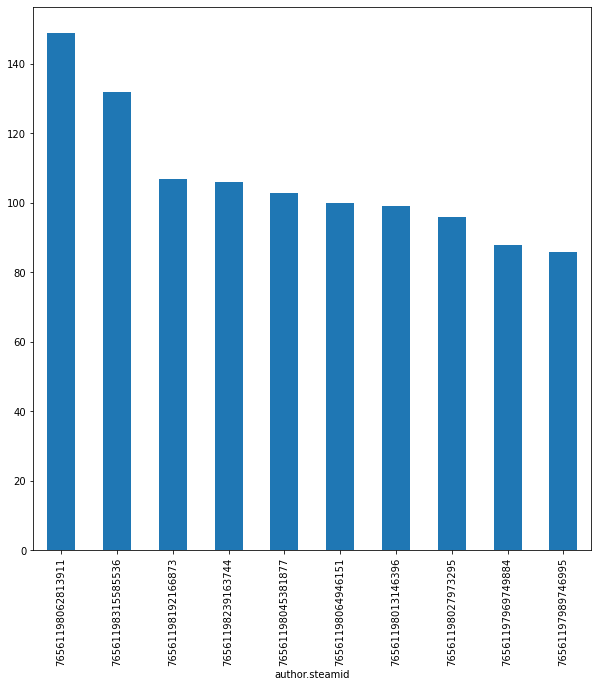

In [19]:
#plotting the the number of reviews made by the top 10 most popular reviewers
most_pop.plot(kind='bar')
plt.show()

The Bar plot shows the number of reviews made by the top 10 most popular reviewers. From the plot we understood that most of the popular reviewers have made an average of 90 to 100 reviews

In [20]:
most_pop.head(1)

author.steamid
76561198062813911    149
dtype: int64

The most popular reviewer is 76561198062813911 (author id) with 149 reviews

### Now lets see which all applications did the most popular author review

We create a new data frame with the review records of the most popular reviewer

In [21]:
df3=df.loc[df['author.steamid'] == 76561198062813911]
df3

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
512675,512676,70,Half-Life,29251440,english,"[h1] DISCLAIMER: This is a full review, and NO...",1484411669,1484411669,True,0,...,True,False,False,76561198062813911,1584,1621,792.0,0.0,790.0,1.520431e+09
539037,539038,240,Counter-Strike: Source,71899643,english,[h1] DISCLAIMER: This is a first impressions r...,1593717565,1593717565,True,0,...,True,False,False,76561198062813911,1584,1621,370.0,0.0,370.0,1.593717e+09
658130,658131,420,Half-Life 2: Episode Two,37036842,english,"[h1] DISCLAIMER: This is a full review, and NO...",1511438724,1511438744,True,1,...,True,False,False,76561198062813911,1584,1621,260.0,0.0,260.0,1.511436e+09
849477,849478,620,Portal 2,17866117,english,"[h1] DISCLAIMER: This is a full review, and NO...",1441305015,1441305258,True,0,...,True,False,False,76561198062813911,1584,1621,392.0,0.0,392.0,1.441297e+09
1549581,1549582,4000,Garry's Mod,6281334,english,[h1] DISCLAIMER: This is a first impressions r...,1374488725,1418986129,True,1,...,True,False,False,76561198062813911,1584,1621,2647.0,0.0,2429.0,1.419871e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578107,21578112,367520,Hollow Knight,44704056,english,[h1] DISCLAIMER: This is a first impressions r...,1536788275,1536788275,True,0,...,True,False,False,76561198062813911,1584,1621,209.0,0.0,209.0,1.536247e+09
21624890,21624895,447820,Day of Infamy,32070388,english,[h1] DISCLAIMER: This is a first impressions r...,1496174428,1496174428,True,0,...,False,False,False,76561198062813911,1584,1621,581.0,0.0,581.0,1.496174e+09
21651066,21651071,598330,SimAirport,30840789,english,[h1] DISCLAIMER: This is a first impressions r...,1490906109,1490906109,True,0,...,True,False,True,76561198062813911,1584,1621,2844.0,1.0,958.0,1.610829e+09
21656340,21656345,543460,Dead Rising 4,68516852,english,"[h1] DISCLAIMER: This is a full review, and NO...",1588540484,1588540491,True,1,...,True,False,False,76561198062813911,1584,1621,626.0,0.0,626.0,1.588522e+09


In [22]:
#Getting the application names
df3.app_name

512675                     Half-Life
539037        Counter-Strike: Source
658130      Half-Life 2: Episode Two
849477                      Portal 2
1549581                  Garry's Mod
                      ...           
21578107               Hollow Knight
21624890               Day of Infamy
21651066                  SimAirport
21656340               Dead Rising 4
21672218    Styx: Shards of Darkness
Name: app_name, Length: 149, dtype: object

The applications reviewed by most popular reviewer are:- Half life, Counter-Strike: Source,Half-Life 2: Episode Two, Portal 2 ...etc with a total of 149 applications

### Lets check how many applications did he purchase, and how many did he get as free.

In [23]:
#Counting the number of applications purchased and got for free
p=df3['steam_purchase'].value_counts()[1]
f=df3['steam_purchase'].value_counts()[0]
l=len(df3.app_name)

In [24]:
steam.count_and_percent_purchase_free(p,f,l)

Number of applications purchased by the popular reviewer
39
Percentage of applications purchased by the popular reviewer
26.174496644295303
Number of applications received for free by the popular reviewer
110
Percentage of applications received for free  by the popular reviewer
73.8255033557047


### How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

Here we have used the column recommended for identifying whether an application is reviewed positively or negatively

Creating two separate dataframes for purchased and free applications

APPLICATIONS MOST POPULAR REVIEWER PURCHASED

In [25]:
dfpaid=df3.loc[df['steam_purchase'] == True]
dfpaid.app_name

512675                     Half-Life
539037        Counter-Strike: Source
658130      Half-Life 2: Episode Two
849477                      Portal 2
1549581                  Garry's Mod
                      ...           
21446171              Sniper Elite 4
21578107               Hollow Knight
21651066                  SimAirport
21656340               Dead Rising 4
21672218    Styx: Shards of Darkness
Name: app_name, Length: 110, dtype: object

APPLICATIONS MOST POPULAR REVIEWER GOT FOR FREE

In [26]:
dffree=df3.loc[df['steam_purchase'] == False]
dffree.app_name

2252905                     Sid Meier's Civilization VI
2708381              Getting Over It with Bennett Foddy
2913786                                      The Forest
3528306                              Volgarr the Viking
3971181                           Insurgency: Sandstorm
4422767                          Euro Truck Simulator 2
5812026                                  Stardew Valley
7237659                                     Bomber Crew
9529366                South Park™: The Stick of Truth™
10441989                                       Broforce
10470508                              The Wolf Among Us
10513258                               The Walking Dead
10987020                                Castle Crashers
11077054                                           GRIS
11134373                                        Outlast
11501096                         FTL: Faster Than Light
11811397                       American Truck Simulator
12558682                                      Du

In [27]:
#Finding the number of free applications the most popular reviewer reviewed positively and negatively
fn=dffree['recommended'].value_counts()[0]
fp=dffree['recommended'].value_counts()[1]
l2=len(dffree.app_name)

There are 38 of the free reviewed positively and only 1 reviewed negatively

In [28]:
steam.count_positive_negative_review_free(fn,fp,l2)

Number of applications purchased and reviewed positively
38
Percentage of applications purchased and reviewed positively
97.43589743589743
Number of applications purchased and reviewed negatively
1
Percentage of applications purchased  and reviewed negatively
2.564102564102564


In [29]:
#Finding the number of paid applications the most popular reviewer reviewed positively and negatively
pn=dfpaid['recommended'].value_counts()[0]
pp=dfpaid['recommended'].value_counts()[1]
l3=len(dfpaid.app_name)

In [30]:
steam.count_positive_negative_review_free(pn,pp,l3)

Number of applications purchased and reviewed positively
108
Percentage of applications purchased and reviewed positively
98.18181818181819
Number of applications purchased and reviewed negatively
2
Percentage of applications purchased  and reviewed negatively
1.8181818181818181


# [RQ6]

## It's time to get information from the updates that a user does to his reviews

### Lets find the average time (days and minutes) a user lets pass before he updates a review

In [31]:
#Here we use the column 'author.playtime_at_review' to find the average time a user lets pass before he add a review 
steam.avg_time_before_update(df)

6  days 167 Minutes


From this we can interpret that the reviewers take an average of 6 days and 167 minutes to play or review an appliaction before updating a review on it. which is quite a good time required to understand and experience the application

### Now lets find and plot the top 3 authors that usually update their reviews

To find the top 3 reviewers who updates the review usually first we remove the reviewers who haven't updated the reviews For that we consider the variables "timestamp created " and "timestamp updated"

In [32]:
steam.removing_nonupdated_reviews(df)

,author.steamid,Differ
13,76561197987104694,71
27,76561198326913512,10765
39,76561198020027165,69
41,76561198316530785,2345
51,76561199039857291,51
...,...,...
21747356,76561198055305524,602648
21747357,76561197997569585,2908
21747362,76561198041215776,138672
21747369,76561198041763187,1395791


Here we deleted the non updated reviews, there were a total of "19298630" reviews that haven't got upadted and the number of reviews that was updated were "2448741"

Now we can count the number of reviews made by each reviewer and find the top 3 reviewers who updates their review usually

In [33]:
top_reviewers=steam.count_number_reviews(df)
top_reviewers

author.steamid
76561198062813911    149
76561198315585536    132
76561198192166873    107
dtype: int64

The top 3 reviewers who usually updates the review are authors with steam id

" 76561198192166873 "

"76561198206999976 "

"76561198072450805 "

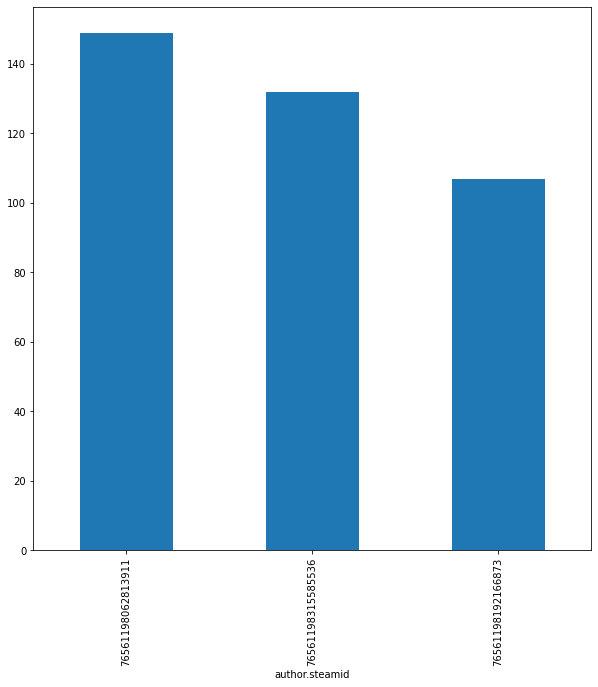

In [34]:
#Plotting the top 3 authors that usually update their reviews
steam.plot_top3_reviewers(top_reviewers)

# [RQ7]

In [35]:
sns.set()

Let's use a dataframe with only the columns we need, so we can minimise the execution times.

In [36]:
df_rq7 = df[['review_id', 'votes_funny', 'weighted_vote_score']]

## Weighted Vote Score

We want to know what's the probability of a review having a *WVS* of at least 0.5.

In order to do so, let's take a first look into how these scores are distributed.

In [37]:
df_rq7['weighted_vote_score'].describe()

count    2.174737e+07
mean     1.654424e-01
std      2.434006e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.827586e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64

The distribution has a mean of about 0.16, and about 3/4 of the votes are below 0.5. 

This tells us that we should expect a low figure for $\mathcal{P}(score \geq 0.5)$

In order to get a better grasp of this data, we should plot an histogram of the values.

<AxesSubplot:xlabel='weighted_vote_score', ylabel='Probability'>

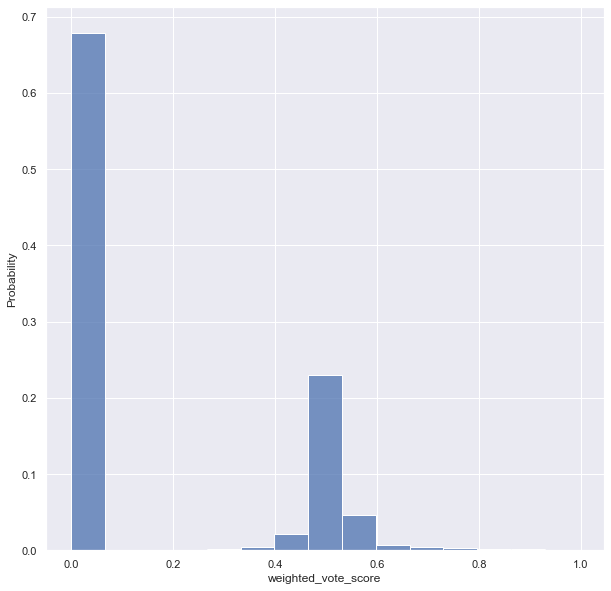

In [38]:
sns.histplot(df_rq7['weighted_vote_score'], bins = 15, stat = "probability")

The vast majority of reviews have a Weighted Vote Score of exactly 0, so instead on working with the entire dataset, let's only focus on those reviews which have a non-zero score.

In [39]:
wvs = df_rq7[df_rq7['weighted_vote_score'] > 0]

print(wvs['weighted_vote_score'].describe())

print("\nThe median is", wvs['weighted_vote_score'].median())

count    6.976357e+06
mean     5.157330e-01
std      6.343698e-02
min      8.186612e-03
25%      4.907975e-01
50%      5.215110e-01
75%      5.238096e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64

The median is 0.5215110182762146


Only about 1/3 of the reviews have a non-zero score. The mean now is very close to 0.5 and the distribution is (probability-wise) symmetric about 0.52; as we can visualize from the updated histogram the scores seem normally distributed, although the right tail is heavier than the left one: reviews tend to have a score higher than 0.5 more likely than lower.

<AxesSubplot:xlabel='weighted_vote_score', ylabel='Probability'>

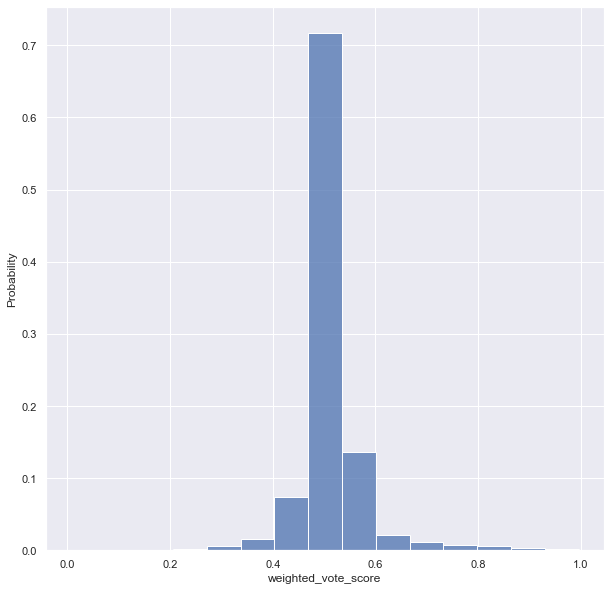

In [40]:
sns.histplot(wvs['weighted_vote_score'], bins = 15, stat = "probability")

To estimate the probability of $\mathcal{P}(score \geq 0.5)$ we can sum up the number of elements contained in each bin in the interval $[0.5, 1.0]$ and then divide the value we get by the total number of binned elements.

This is easily done by operating directly on the dataset.

In [41]:
prob_wvs = steam.compute_prob(wvs, 'weighted_vote_score', 0.5)

print(steam.format_prob(prob_wvs))

68.58%


About 2/3 of the reviews have a Weighted Vote Score of at least 0.5.

On the other hand, by considering the original dataset we would have gotten only about 1/5 of the reviews.

In [42]:
prob_wvs_orig = steam.compute_prob(df_rq7, 'weighted_vote_score', 0.5)

print(steam.format_prob(prob_wvs_orig))

22.00%


## Let's take a deeper look into these reviews

We want to study the correlation between a review having a *WVS* bigger than or equal to 0.5 and it being rated as 'Funny'.

First, let's compute the probability of a review having at least one 'Funny' vote given $WVS \geq 0.5$:

$\mathcal{P}(funny \geq 1\: |\: WVS \geq 0.5)$

We can filter the `wvs` dataframe with non-zero only *WVS's* so it only includes reviews with $WVS \geq 0.5$, and then compute the frequency (the *probability*) __among those__ of reviews that have at least one 'Funny' vote.

In [43]:
prob_wvs_funny = steam.compute_prob(wvs[wvs['weighted_vote_score'] >= 0.5], 'votes_funny', 1)

print(steam.format_prob(prob_wvs_funny))

24.91%


About 1/4 of those reviews have received at least one 'Funny' vote.

### Are these two events independent?

If the probability of a review having $WVS \geq 0.5$ and the probability of it having been rated as 'Funny' by at least one user are independent, then we expect

$\mathcal{P}(WVS \geq 0.5\: \text{and}\: funny \geq 1) = \mathcal{P}(WVS \geq 0.5)\cdot\mathcal{P}(funny \geq 1)$

i.e.

$\mathcal{P}(funny \geq 1\: |\: WVS \geq 0.5) = \frac{\mathcal{P}(WVS \geq 0.5\: \text{and}\: funny \geq 1)}{\mathcal{P}(WVS \geq 0.5)} = \mathcal{P}(funny \geq 1)$

In order to check if this equality holds, let's compute $\mathcal{P}(funny \geq 1)$.

We will filter these reviews out of the dataset which contains only reviews with non-zero *WVS*'s.

In [44]:
prob_funny = steam.compute_prob(wvs, 'votes_funny', 1)

print(steam.format_prob(prob_funny))

25.45%


If we evaluate

In [45]:
print(steam.format_prob(prob_wvs_funny / prob_funny))

97.88%


We get a value which is quite close to 1, but not enough to say with reasonable certainty that the two are independent.

Let's plot them and see if we can actually spot any relationship between the *WVS* of a review and the number of 'Funny' votes it received.

We'll get this data by considering only rows of the `wvs` dataframe which have both $WVS\geq0.5$ and at least one 'Funny' vote, so we can actually compare values out of the same reviews.

**Remark:** for this analysis we will only consider reviews with at most 100 'Funny' votes, since they are the vast majority and so we can certainly exclude reviews with a suspiciously large number of votes.

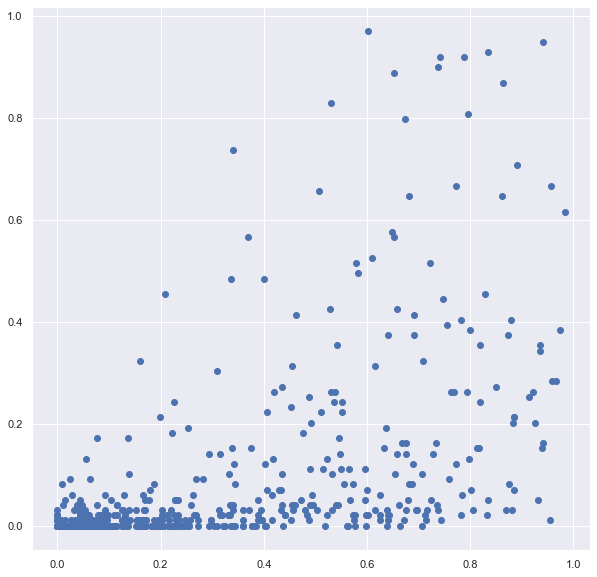

In [46]:
wvs_funny = wvs[(wvs['weighted_vote_score'] >= 0.5) 
                 & (wvs['votes_funny'] >= 1) 
                 & (wvs['votes_funny'] <= 100)]

# We normalize the values so they are between 0 and 1
wvs_norm = steam.norm_col(wvs_funny['weighted_vote_score'])
funny_norm = steam.norm_col(wvs_funny['votes_funny'])

plt.scatter(wvs_norm[:1000], funny_norm[:1000])

By plotting only the first 1000 values we can see *some* linear relationship.

If we compute the linear relationship of all filtered values we do in fact get a value of

In [47]:
print(wvs_norm.corr(funny_norm))

0.5161788195426809


which indicates the variables do have some correlation.

Hence we should be able to safely conclude that the two **are not** independent.

# [RQ8]

In [48]:
df_rq8 = df[['review_id', 
             'weighted_vote_score', 
             'language', 
             'recommended', 
             'timestamp_created', 
             'timestamp_updated']]

### Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian?

Let's first take a look into the summaries of both. As we showed in **RQ4** most of the reviews have a Weighted Vote Score of 0, so we'll filter those out of the columns we will be using.

In [49]:
# Standard and Traditional Chinese
df_chi = df_rq8[(df_rq8['language'] == 'schinese') | (df_rq8['language'] == 'tchinese')]
df_chi_nonzero = df_chi[df_chi['weighted_vote_score'] > 0]

print(df_chi_nonzero['weighted_vote_score'].describe())
print("The median is", df_chi_nonzero['weighted_vote_score'].median())

count    1.100793e+06
mean     5.281437e-01
std      7.782352e-02
min      2.384956e-02
25%      5.003073e-01
50%      5.238096e-01
75%      5.289855e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64
The median is 0.523809552192688


In [50]:
df_rus = df_rq8[df_rq8['language'] == 'russian']
df_rus_nonzero = df_rus[df_rus['weighted_vote_score'] > 0]

print(df_rus_nonzero['weighted_vote_score'].describe())
print("The median is", df_rus_nonzero['weighted_vote_score'].median())

count    968346.000000
mean          0.517954
std           0.058936
min           0.043478
25%           0.494232
50%           0.521739
75%           0.523810
max           0.989523
Name: weighted_vote_score, dtype: float64
The median is 0.52173912525177


The two summaries tell us we should expect us very similar distributions for the two languages; let's actually compare the histograms we get.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


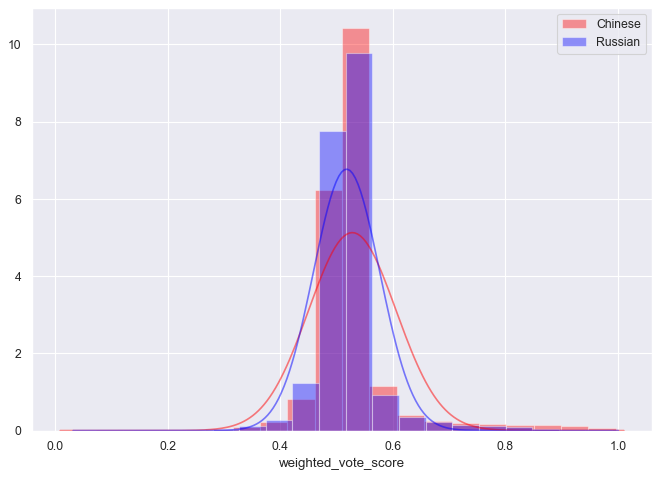

In [51]:
plt.figure(figsize=(10,7), dpi= 80)
sns.set()

sns.distplot(df_chi_nonzero['weighted_vote_score'], 
             fit = norm,
             kde = False,
             bins = 20,
             color = "red",
             fit_kws = {"color": "red", "alpha": 0.5},
             label = "Chinese")

sns.distplot(df_rus_nonzero['weighted_vote_score'], 
             fit = norm, 
             kde = False,
             bins = 20,
             color = "blue",
             fit_kws = {"color": "blue", "alpha": 0.5},
             label = "Russian")

plt.legend()
plt.show()

The two distributions look in fact similar; if we overlay two Gaussian PDF's over the histograms, their shapes closely resemble each other, with the one describing the Russian reviews narrower and more peaked in 0.5, and the one describing the Chinese reviews wider and with its peak slightly past 0.5.

Let's also compare their boxplots; since the histograms are so peaked, it's a good idea to only limit the y-axis to values close to the mean, so outliers – which in this case are many – don't compress the 'box'.

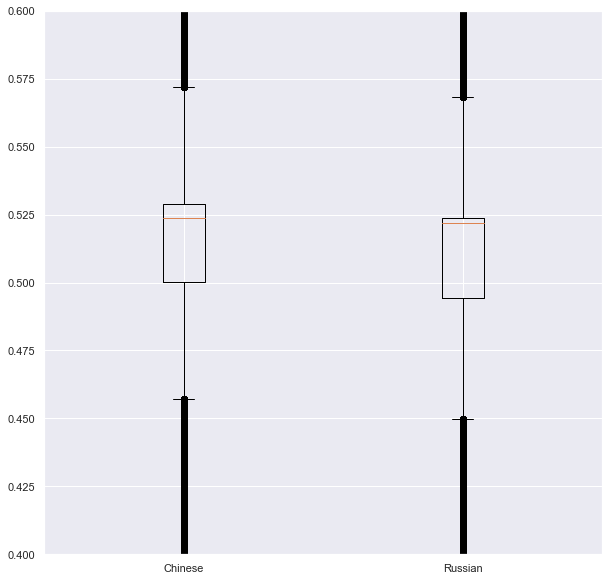

In [52]:
plt.boxplot([df_chi_nonzero['weighted_vote_score'], 
             df_rus_nonzero['weighted_vote_score']],
             labels = ["Chinese", "Russian"])
plt.ylim(0.4, 0.6)
plt.show()

The medians are very close to each other, but it's clear how the Russian *WVS's* are more skewed towards higher values.

### Is there any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score?
Let's first clean the dataset, by filtering out all the reviews which have a timestamp past 2021 and a Weighted Vote Score of exactly 0.

In [53]:
df_rq8 = df_rq8[(pd.to_datetime(df_rq8['timestamp_updated']).dt.year <= 2021) & (df_rq8['weighted_vote_score'] > 0)]

In order to find any meaningful relationship between the two, it is convenient to normalize the values so their maximum is equal to 1 and their minimum is equal to 0.

In [54]:
delta = steam.norm_col(df_rq8['timestamp_updated'] - df_rq8['timestamp_created'])
score = steam.norm_col(df_rq8['weighted_vote_score'])

If we produce a scatter plot of the two and set an extremely small marker size, we actually get a very interesting noisy figure, with its denser part resembling the area under a bell curve centered in 0.5, and with some unusual equidistant thicker vertical and horizontal lines especially visible around 0.5, possibly caused by the normalization we did earlier.

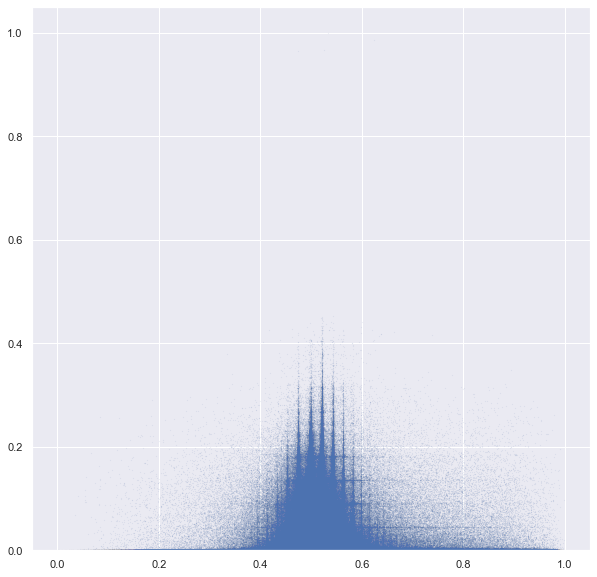

In [55]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(score, delta, s = 0.001)
plt.ylim(0,)
plt.show()

This tells us that the reviews which get updated after the longest time tend to have an 'average' *WVS* (approximately in the interval $[0.4,0.6]$). 

The two main reasons why an author may want to update a review are two:
- change of opinion
- further comments

In both cases, *early* reviews (before they are updated) may end up getting a low *WVS* because they are either badly or prematurely written, or because the author him/herself has indicated he/she would only update his/her review at a later time; when the review is updated, if it's well received its *WVS* will increase and will balance out the pre-edit score, otherwise it will either stay as low or stay as high.

The plot is also much more noisy on the right side, which reinforces what we said in **RQ7** about the *WVS* distribution being skewed towards values higher than 0.5.

Another interesting observation is that reviews with a score higher than 0.5 look all equally as likely to be updated soon after their creation or not at all (the thick horizontal line to the right laying on 0), whether reviews with low scores only seem to get updated if they are already close enough to an 'average' score (approximately higher than 0.2); this suggests – and confirms our intuition – that 'troll' or unreasonably negative reviews don't get updated as much.

In order to get a better look at how those points are distributed in $[0,1]\times[0,1]$ we can create a histogram of their distances from the origin $(0,0)$, which should closely resemble the shape we got in the earlier plot.

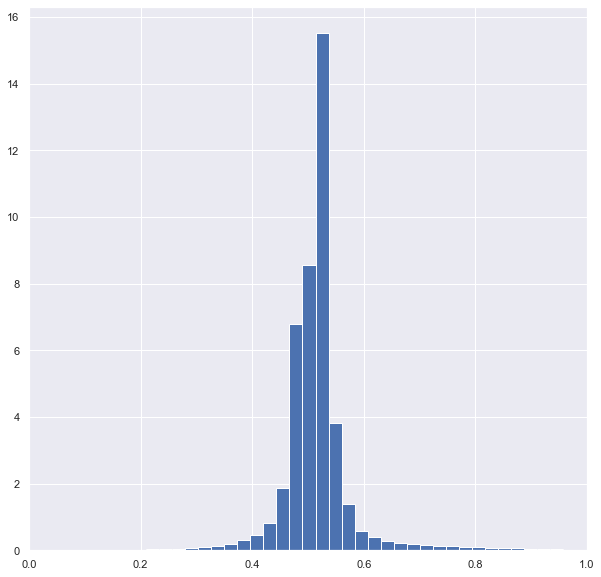

In [57]:
import numpy as np

dist = np.sqrt(score**2 + delta**2)

num_of_bins = 50

count, bins, _ = plt.hist(dist, num_of_bins, density=True)

plt.xlim(0,1)
plt.show()

Lastly, we can see how well a Normal curve fits this histogram.

In [58]:
(mu_fit, sigma_fit), _ = curve_fit(gauss, bins[1:], count)

plt.hist(dist, num_of_bins, density=True)

x = np.linspace(0, 1, 1000)
plt.plot(x, steam.gauss(x, mu_fit, sigma_fit), color = "red")
plt.show()

NameError: name 'gauss' is not defined

We get a Gaussian with parameters

In [59]:
print("mu =", mu_fit)
print("sigma =", sigma_fit)

NameError: name 'mu_fit' is not defined

So we can definitely conclude there is a strong relationship between the *WVS* of a review and the time passed between its creation and its update, but – in our opinion – it's not necessairly significant or requiring a more detailed analysis.

### What if we consider whether an application has been recommended or not?

Let's redefine `df_rq8` so it now only includes recommended applications

In [60]:
df_recomm = df_rq8[df_rq8['recommended'] == True]

and let's compare the scores and time differences we get to those we computed earlier.

In [61]:
delta_recomm = steam.norm_col(df_recomm['timestamp_updated'] - df_recomm['timestamp_created'])
score_recomm = steam.norm_col(df_recomm['weighted_vote_score'])

To compare them we can check how different their summaries are by studying their ratio and checking how far away they are from 1

In [62]:
print("Time Difference")
print(delta.describe() / delta_recomm.describe())

print("Weighted Vote Score")
print(score.describe() / score_recomm.describe())

Time Difference
count    1.292597
mean     0.964974
std      0.968708
min           NaN
25%      1.000000
50%      1.000000
75%      1.000000
max      1.000000
dtype: float64
Weighted Vote Score
count    1.292597
mean     0.984557
std      1.091393
min           NaN
25%      0.981289
50%      0.995542
75%      1.000000
max      1.000000
Name: weighted_vote_score, dtype: float64


The ratios of the summaries are all close to 1 and thus if we repeat the same analysis we did earlier we can expect a very similar outcome, i.e. whether a review has been Recommended doesn't affect the relationship between `delta` and `score`.

Let's also check if anything changes if an author does **not** recommend an application.

In [63]:
df_notrecomm = df_rq8[df_rq8['recommended'] == False]

delta_notrecomm = steam.norm_col(df_recomm['timestamp_updated'] - df_recomm['timestamp_created'])
score_notrecomm = steam.norm_col(df_recomm['weighted_vote_score'])

print("Time Difference")
print(delta.describe() / delta_recomm.describe())

print("Weighted Vote Score")
print(score.describe() / score_recomm.describe())

Time Difference
count    1.292597
mean     0.964974
std      0.968708
min           NaN
25%      1.000000
50%      1.000000
75%      1.000000
max      1.000000
dtype: float64
Weighted Vote Score
count    1.292597
mean     0.984557
std      1.091393
min           NaN
25%      0.981289
50%      0.995542
75%      1.000000
max      1.000000
Name: weighted_vote_score, dtype: float64


Just like before the ratios are all approximately 1, hence we can conclude that whether a review does recommend or not an application does not affect the relationship between its WVS and the time passed between its creation and its update.

### What are histograms, bar plots, scatterplots and pie charts used for?

**Histograms** are used to roughly estimate the distribution of a certain sample of **numerical** data. They are created by populating a fixed number of equally sized *bins* (ranging from the minimum to the maximum value in the sample) with all the values that fall in the interval the bin is defined over. A common 'physical' example of a histogram is Galton's quincunx.

**Bar Plots** are used to compare the values that related
discrete variables take, for instance the number of occurences of words in a document or how many movies actors in Hollywood have starred in. 

**Scatter Plots** are used to study the relationship between two or more variables, by displaying them on a Cartesian plane or volume. For instance they could be used to study how dependent the weight and the height of a person are, and how closely the points group together to form a straight line or any other curve.

**Pie Charts** are used to represent the proportion of quantities – usually as a percentage – of a certain kind: the bigger the quantity is the larger its slice will be. For instance it can be used to show the proportion of religions in a country. They are often interchangeable with bar plots.

### What insights can you extract from a Box Plot?

A box plot depicts the main characteristics of the distribution of a sample of data in a single plot. It shows the mean, the median, the first and third quartiles, the minimum, the maximum, and outliers. For instance they can be used to compare measurements across several physical experiments in the same conditions, or to check how skewed are some data which are supposed to be distributed symmetrically and then understand why that may be.